In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
gandhara_probs = pd.read_csv("gandhara_greek_probabilities.csv")
gandhara_metadata = pd.read_csv("gandhara_with_date.csv")

In [8]:
gandhara_metadata

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0             0             0               0                 0   
1             1             1               1                 1   
2             2             2               2                 2   
3             3             3               3                 3   
4             4             4               4                 4   
..          ...           ...             ...               ...   
191         191           191             191               191   
192         192           192             192               192   
193         193           193             193               193   
194         194           194             194               194   
195         195           195             195               195   

                                                 Image    Object type  \
0    https://media.britishmuseum.org/media/Reposito...        capital   
1    https://media.britishmuseum.org/media/Reposito...        capital   
2    https://media.britishmuseum.org/media/Reposito...        capital   
3    https://media.britishmuseum.org/media/Reposito...        diptych   
4    https://media.britishmuseum.org/media/Reposito...         figure   
..                                                 ...            ...   
191  https://media.britishmuseum.org/media/Reposito...    stair-riser   
192  https://media.britishmuseum.org/media/Reposito...    stair-riser   
193  https://media.britishmuseum.org/media/Reposito...          stupa   
194  https://media.britishmuseum.org/media/Reposito...          stupa   
195  https://media.britishmuseum.org/media/Reposito...  wall-painting   

         Museum number                                              Title  \
0         No: 1880.174                                                NaN   
1         No: 1880.172                                                NaN   
2         No: 1880.357                                                NaN   
3    No: 1902,1220.176                                                NaN   
4         No: 1880.185                                The Buddha (Object)   
..                 ...                                                ...   
191        No: 1880.54                         The Śyāma jātaka. (Object)   
192        No: 1880.41                 The Maitrakanyaka jātaka. (Object)   
193    No: 1914,0502.1                         The First Sermon. (Object)   
194       No: 1880.227  The Birth of the Buddha. (Object); The Assault...   
195   No: 1925,0619.20                                                NaN   

     Denomination  Escapement  ...  Dept  BM/Big number     Reg number  \
0             NaN         NaN  ...  Asia            NaN       1880.174   
1             NaN         NaN  ...  Asia            NaN       1880.172   
2             NaN         NaN  ...  Asia            NaN       1880.357   
3             NaN         NaN  ...  Asia            NaN  1902,1220.176   
4             NaN         NaN  ...  Asia            NaN       1880.185   
..            ...         ...  ...   ...            ...            ...   
191           NaN         NaN  ...  Asia            NaN        1880.54   
192           NaN         NaN  ...  Asia            NaN        1880.41   
193           NaN         NaN  ...  Asia            NaN    1914,0502.1   
194           NaN         NaN  ...  Asia            NaN       1880.227   
195           NaN         NaN  ...  Asia            NaN   1925,0619.20   

     Add ids  Cat no  Banknote serial number  Joined objects           id  \
0        NaN     NaN                     NaN             NaN      1880174   
1        NaN     NaN                     NaN             NaN      1880172   
2        NaN     NaN                     NaN             NaN      1880357   
3        NaN     NaN                     NaN             NaN  19021220176   
4        NaN     NaN                     NaN             NaN      1880185   
..       ...     ...                     ...   

In [4]:
gandhara_probs

greek_probability                  filepath         id
0             0.000006    ./gandhara/1880106.jpg    1880106
1             0.000013  ./gandhara/196105194.jpg  196105194
2             0.000003  ./gandhara/189208017.jpg  189208017
3             0.000013  ./gandhara/190712281.jpg  190712281
4             0.417916  ./gandhara/190412175.jpg  190412175
..                 ...                       ...        ...
191           0.000054  ./gandhara/188907035.jpg  188907035
192           0.000032  ./gandhara/196702215.jpg  196702215
193           0.002967  ./gandhara/192202111.jpg  192202111
194           0.000246  ./gandhara/190005221.jpg  190005221
195           0.023470  ./gandhara/190210027.jpg  190210027

[196 rows x 3 columns]

In [21]:
gandhara_metadata_filtered = gandhara_metadata[["date", "id", "Object type", "Description", "Materials", "Technique"]]

In [22]:
gandhara = pd.merge(gandhara_metadata_filtered, gandhara_probs, on="id")

In [50]:
def predict(input):
    if input > 0.5:
        return 1
    else:
        return 0
gandhara["prediction"] = gandhara["greek_probability"].apply(predict)

C:\Users\jerom\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
gandhara

date           id    Object type  \
0    200.0      1880174        capital   
2    200.0      1880357        capital   
3    700.0  19021220176        diptych   
4    200.0      1880185         figure   
5    200.0      1880187         figure   
..     ...          ...            ...   
191  200.0       188054    stair-riser   
192  200.0       188041    stair-riser   
193  200.0    191405021          stupa   
194  200.0      1880227          stupa   
195  600.0   1925061920  wall-painting   

                                           Description Materials  \
0    Part of a Corinthian capital. A rectangular pr...    schist   
2    Part of a Corinthian capital like the precedin...    schist   
3    A leaf in black schist from a diptych depictin...    schist   
4    Head from a Buddha image. The head is round to...    schist   
5    Head from a Buddha image. The head is round to...    schist   
..                                                 ...       ...   
191  Stair-riser length with episodes of the Śyāma ...    schist   
192  Stair-riser length showing perhaps the Maitrak...    schist   
193  Panel from a harmikā perhaps showing the First...    schist   
194  One of four faces of this stupa base or harmik...    schist   
195  Fragment of a wall-painting showing the Buddha...   plaster   

          Technique  greek_probability                    filepath  prediction  
0    carved; relief           0.000002      ./gandhara/1880174.jpg           0  
2    carved; relief           0.000517      ./gandhara/1880357.jpg           0  
3            carved           0.000062  ./gandhara/19021220176.jpg           0  
4            carved           0.000015      ./gandhara/1880185.jpg           0  
5            carved           0.000010      ./gandhara/1880187.jpg           0  
..              ...                ...                         ...         ...  
191          carved           0.853776       ./gandhara/188054.jpg           1  
192          carved           0.082580       ./gandhara/188041.jpg           0  
193          carved           0.385597    ./gandhara/191405021.jpg           0  
194          carved           0.001326      ./gandhara/1880227.jpg           0  
195         painted           0.837626   ./gandhara/1925061920.jpg           1  

[187 rows x 9 columns]

In [26]:
gandhara = gandhara[gandhara["date"] < 1000]

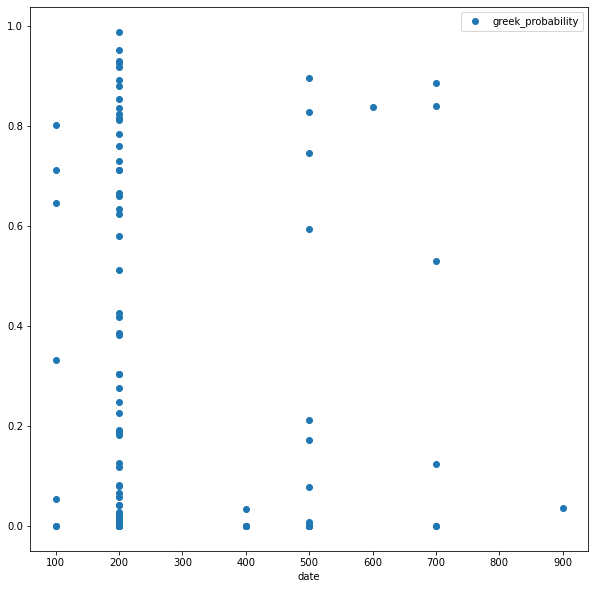

In [32]:
gandhara.plot(x='date', y='greek_probability', style='o', figsize=(10, 10))

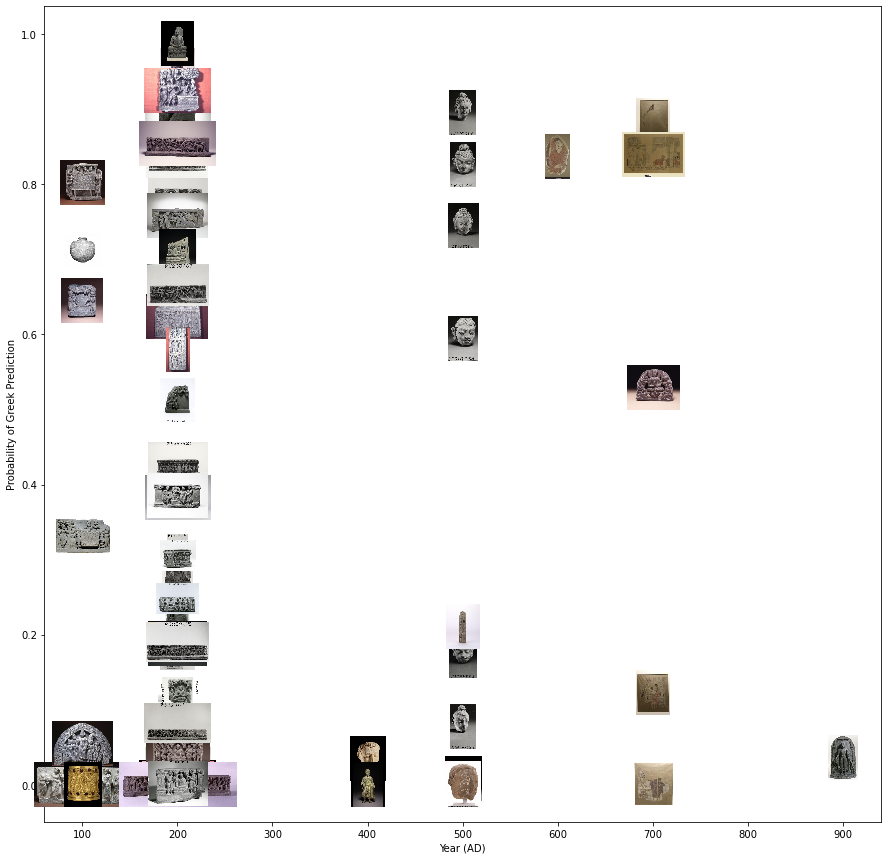

In [47]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)
    
paths = gandhara["filepath"].tolist()
x = gandhara["date"].tolist()
y = gandhara["greek_probability"].tolist()

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x, y) 
ax.set_xlabel("Year (AD)")
ax.set_ylabel("Probability of Greek Prediction")

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path, 0.1), (x0, y0), frameon=False)
    ax.add_artist(ab)

In [54]:
greek_gandhara = gandhara[gandhara["prediction"] == 1]
buddhist_gandhara = gandhara[gandhara["prediction"] == 0]

In [53]:
greek_gandhara

date            id        Object type  \
15   200.0     195704291             figure   
22   500.0       1880117             figure   
25   500.0       1880118             figure   
31   200.0     196305222             figure   
33   200.0     194810111             figure   
34   500.0       1880114             figure   
44   500.0       1880107             figure   
46   200.0     192911042             figure   
52   200.0        188071             figure   
54   200.0     189907151             figure   
56   700.0    1887071771             figure   
67   200.0     190210026              gable   
72   700.0  191901010513       painting; 繪畫   
74   700.0  191901010511       painting; 繪畫   
75   200.0       1880188              panel   
77   200.0     189809135              panel   
81   200.0       1880207              panel   
102  200.0    1899071510              panel   
103  200.0    1899060925              panel   
106  200.0     193707151              panel   
115  200.0     197906281              panel   
132  100.0     196610172              panel   
148  200.0    1913110821              panel   
149  200.0    1899060942              panel   
161  200.0        188065              panel   
163  200.0     195710151              panel   
167  100.0     197209201              panel   
173  200.0    1917100911              panel   
174  200.0    1902100214              panel   
184  100.0        188027  reliquary; casket   
186  200.0        188039        stair-riser   
188  200.0        188048        stair-riser   
191  200.0        188054        stair-riser   
195  600.0    1925061920      wall-painting   

                                           Description      Materials  \
15   Seated Buddha in dhyāna, originally flanked by...         schist   
22   Head from a Buddha image. The round to oval he...  gypsum-stucco   
25   Head from a Buddha image. The long oval head h...  gypsum-stucco   
31   Fragment with an image chapel containing a fig...          stone   
33   Seated Buddha preaching. The neckline forms a ...          stone   
34   Head from a Buddha image. The round to oval he...  gypsum-stucco   
44   Head from a Buddha image. The head is round to...  gypsum-stucco   
46   Head from a Buddha image. The hair undulates d...         schist   
52   Seated Buddha in dhyāna. The major drapery fol...         schist   
54   Standing Buddha, carved in grey schist. The st...         schist   
56   A small openwork panel depicting the First Ser...       steatite   
67   Part of the side of a false gable panel with t...         schist   
72   Painting fragments showing part of a halo, pos...       silk; 絲綢   
74   Painting fragments showing one seated and two ...       silk; 絲綢   
75   Stupa drum panel showing the Buddha and worshi...         schist   
77   Fragment of a panel with heads under a cornice...         schist   
81   Part of a panel with a caitya arch frieze of t...         schist   
102  Stupa drum panel showing the Entreaty to Preac...         schist   
103  Part of a stupa drum panel showing the Buddha ...         schist   
106  Panel with parts of two scenes, the second fro...         schist   
115  Stupa drum panel showing the Great Renunciatio...         schist   
132  Panel showing the Entreaty to Preach the Doctr...         schist   
148  Panel showing perhaps the departing Viśvaṃtara...         schist   
149  Part of a panel, originally trapezoidal and pr...         schist   
161  Part of a panel showing the Bodhisattva partin...         schist   
163  Panel showing the Submission of Apalāla. The B...         schist   
167  Panel showing the Return to Kapilavastu. Two w...         schist   
173  Top scene of three on an upright showing the B...         schist   
174  Part of a panel showing the hand of the Bodhis...         schist   
184  Reliquary casket, globular in shape with a lid...       steatite   
186  Stair-riser length showing perhaps the Candaki...         schist   
188  Stair-riser length,

In [66]:
len(greek_gandhara)

34

In [ ]:
import matplotlib.image as mpimg


In [101]:
def display_images(images, title, l=6, w=6):
    fig, ax = plt.subplots(6, 6, figsize=(20, 20))
    ax = ax.ravel()

    for i in range(len(images)):
        this_ax = ax[i]
        this_ax.set_xticks([])
        this_ax.set_yticks([])
        this_ax.imshow(mpimg.imread(images[i]))

    for i in range(len(images), len(ax)):
        ax[i].set_axis_off()

    fig.suptitle(title,fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

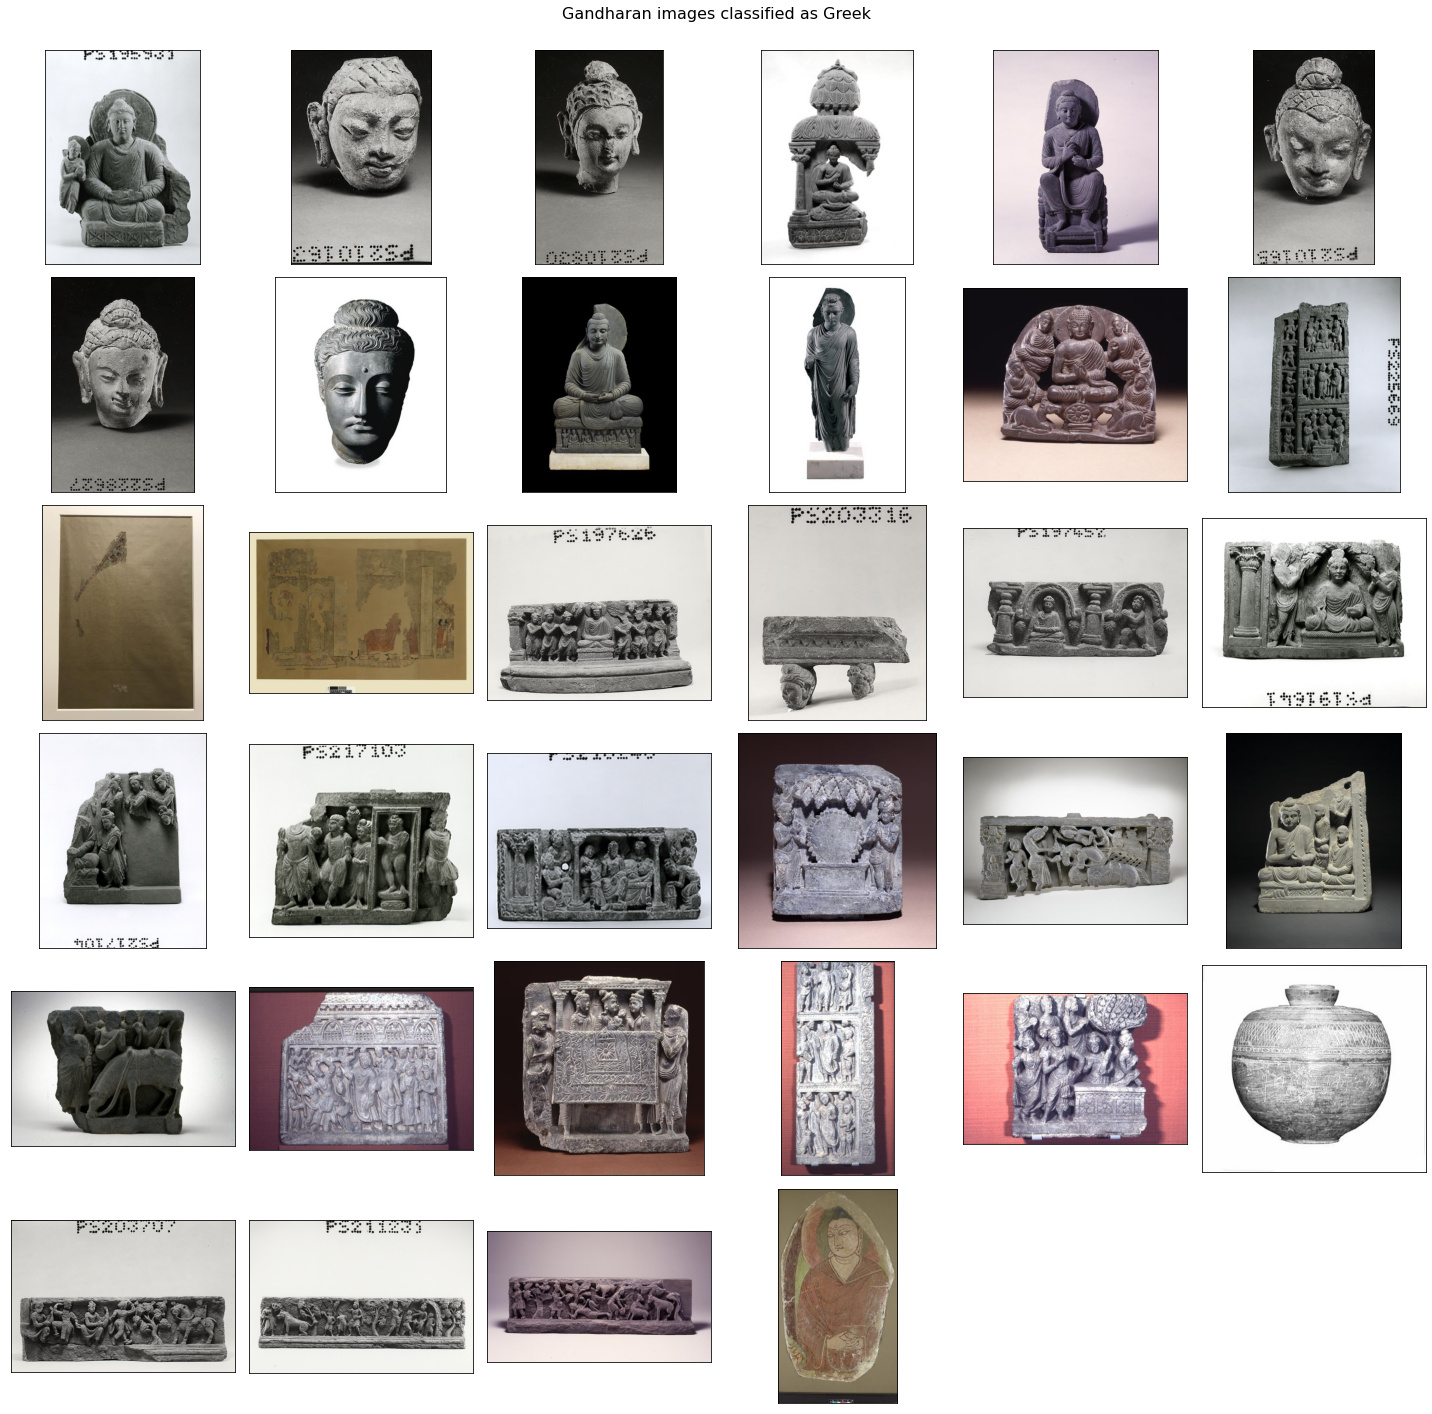

In [104]:
display_images(greek_gandhara["filepath"].tolist(), "Gandharan images classified as Greek")

In [57]:
len(greek_gandhara)

34

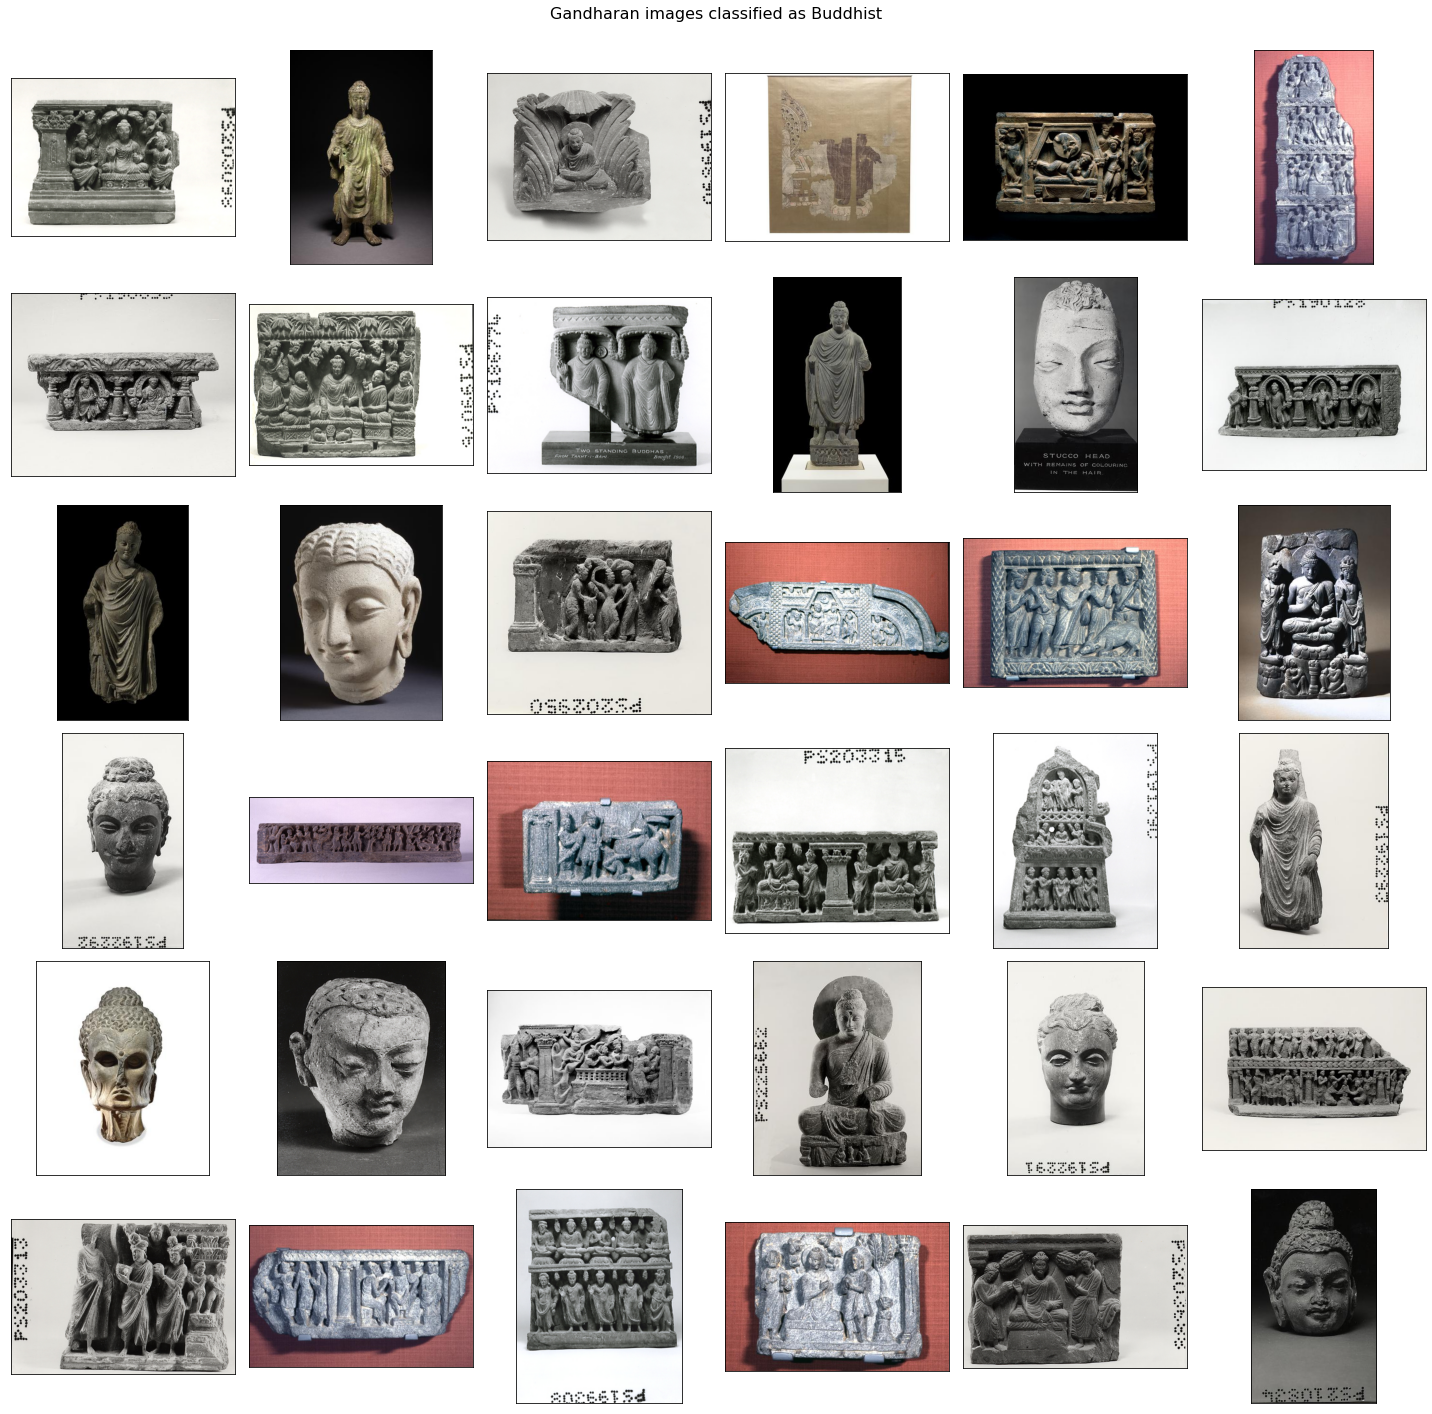

In [103]:
display_images(buddhist_gandhara.sort_values("greek_probability")["filepath"].tolist()[:36], "Gandharan images classified as Buddhist")